In [1]:
from qiskit import*
%matplotlib inline
from qiskit.tools.visualization import plot_histogram

In [9]:
secretnumber = '10001100001'

In [10]:
circuit=QuantumCircuit(len(secretnumber)+1, len(secretnumber))

#circuit.h([0,1,2,3,4,5])
circuit.h(range(len(secretnumber)))
circuit.x(len(secretnumber))
circuit.h(len(secretnumber))

circuit.barrier()

for ii, yesno in enumerate(reversed(secretnumber)):
    if yesno == '1':
        circuit.cx(ii, len(secretnumber))    
        
#circuit.cx(5,6)
#circuit.cx(3,6)
#circuit.cx(0,6)

circuit.barrier()
#circuit.h([0,1,2,3,4,5])
circuit.h(range(len(secretnumber)))

circuit.barrier()
circuit.measure(range(len(secretnumber)),range(len(secretnumber)))

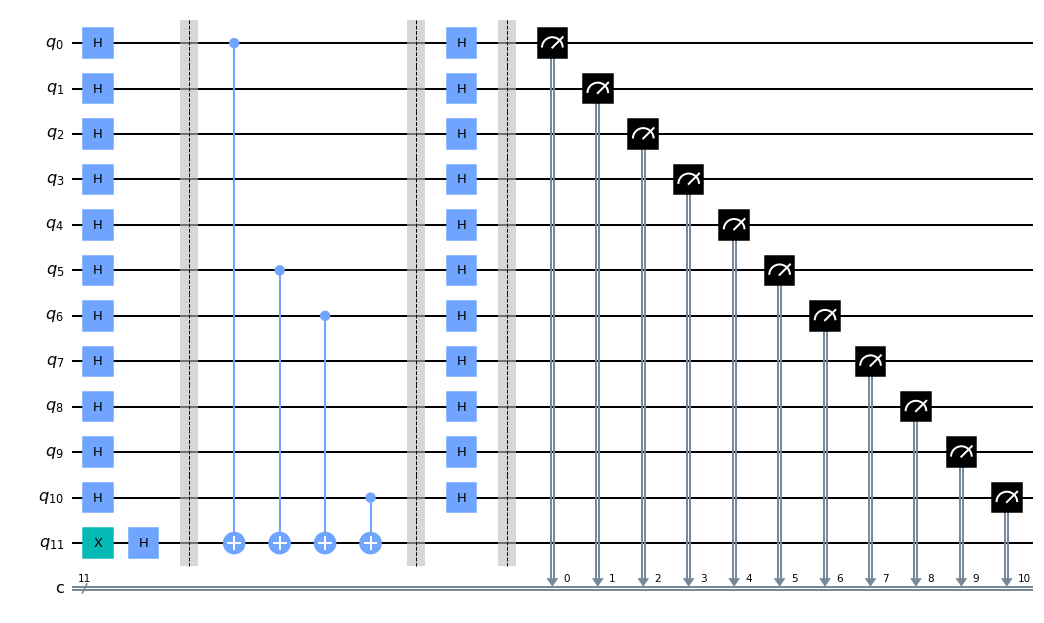

In [11]:
circuit.draw(output= 'mpl')

In [15]:
simulator=Aer.get_backend('qasm_simulator')
result= execute(circuit, backend = simulator, shots=1).result()
counts= result.get_counts()
print(counts)


{'10001100001': 1}


In [16]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [17]:
provider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')

In [18]:
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_bogota') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_m

In [32]:
qcomp= provider.get_backend('ibmq_qasm_simulator')

In [33]:
qcomp.configuration()

In [40]:
job= execute(circuit, backend=qcomp, shots=1)

In [41]:
from qiskit.tools.monitor import job_monitor
job_monitor(job)

Job Status: job has successfully run


In [42]:
result = job.result()

In [47]:
counts= result.get_counts()
print(counts)
statevector= result.get_statevector()
print(statevector)
from qiskit.tools.visualization import plot_bloch_multivector
plot_bloch_multivector(statevector)

{'10001100001': 1}


QiskitError: 'No statevector for experiment "None"'